In [1]:
from glob import glob
from script_converter import get_transformation_matrix
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom
import numpy as np
from rt_utils.image_helper import apply_transformation_to_3d_points

In [2]:
t2_mat = get_transformation_matrix('data/t2/')
new_t2_mat = np.array(t2_mat)
t2_img1_dcm = pydicom.dcmread('data/t2/IM-6392-0001.dcm')
t2_img1 = t2_img1_dcm.pixel_array

t2_img20_dcm = pydicom.dcmread('data/t2/IM-6392-0020.dcm')
t2_img20 = t2_img20_dcm.pixel_array
t2_h, t2_w = t2_img1_dcm.pixel_array.shape     # 320*320

print(t2_h)
print(t2_w)

ktrans_mat = get_transformation_matrix('data/ktrans/')
new_ktrans_mat = np.array(ktrans_mat)
ktrans_img1_dcm = pydicom.dcmread('data/ktrans/slice-001.dcm')
kt_img1 = ktrans_img1_dcm.pixel_array

ktrans_img20_dcm = pydicom.dcmread('data/ktrans/slice-020.dcm')
kt_img20 = ktrans_img20_dcm.pixel_array

kt_h, kt_w = ktrans_img1_dcm.pixel_array.shape   # 160*160

320
320


## Convert the pixels of the first slice into patient coordinates

In [3]:
t2_ys, t2_xs = np.where(np.ones((t2_h, t2_w)))
# contain the row and column indices 384 to 384
kt_ys, kt_xs = np.where(np.ones((kt_h, kt_w)))

t2_coords = np.concatenate((t2_ys.reshape(-1, 1), t2_xs.reshape(-1, 1)), axis=1)
kt_coords = np.concatenate((kt_ys.reshape(-1, 1), kt_xs.reshape(-1, 1)), axis=1)

#ys.reshape(-1,1) changes ys into a column vector
#coords is list of 2D coordinates

# extended_coords0 = np.concatenate((coords, np.ones((h*w, 1))*0), axis=1) #give 2d coordinates a thickness and third dimension??

# extended_coords1 = np.concatenate((coords, np.ones((h*w, 1))*1), axis=1)

# extended_coords2 = np.concatenate((coords, np.ones((h*w, 1))*2), axis=1)

t2_extended_coords_list = []
kt_extended_coords_list = []

# Iterate through values 0 to 19
for i in range(20):
    # Concatenate coords with a column of ones multiplied by i
    t2_extended_coords = np.concatenate((t2_coords, np.ones((t2_h * t2_w, 1)) * i), axis=1)
    kt_extended_coords = np.concatenate((kt_coords, np.ones((kt_h * kt_w, 1)) * i), axis=1)
    # Append the extended_coords array to the list
    t2_extended_coords_list.append(t2_extended_coords)
    kt_extended_coords_list.append(kt_extended_coords)

In [5]:
# patient_coords0 = apply_transformation_to_3d_points(extended_coords0, new_mat)
# patient_coords1 = apply_transformation_to_3d_points(extended_coords1, new_mat)
# patient_coords2 = apply_transformation_to_3d_points(extended_coords2, new_mat)

t2_patient_coords_list = []
kt_patient_coords_list = []

for i in range(20):
    t2_patient_coords = apply_transformation_to_3d_points(t2_extended_coords_list[i], new_t2_mat)
    t2_patient_coords_list.append(t2_patient_coords)

    kt_patient_coords = apply_transformation_to_3d_points(kt_extended_coords_list[i], new_ktrans_mat)
    kt_patient_coords_list.append(kt_patient_coords)

#map 3 layers into 3D space

In [6]:
cmap = matplotlib.cm.get_cmap('Greys')

/var/folders/51/_2wsdm_96213mx6mrlgrt1pc0000gn/T/ipykernel_11212/407461067.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Greys')


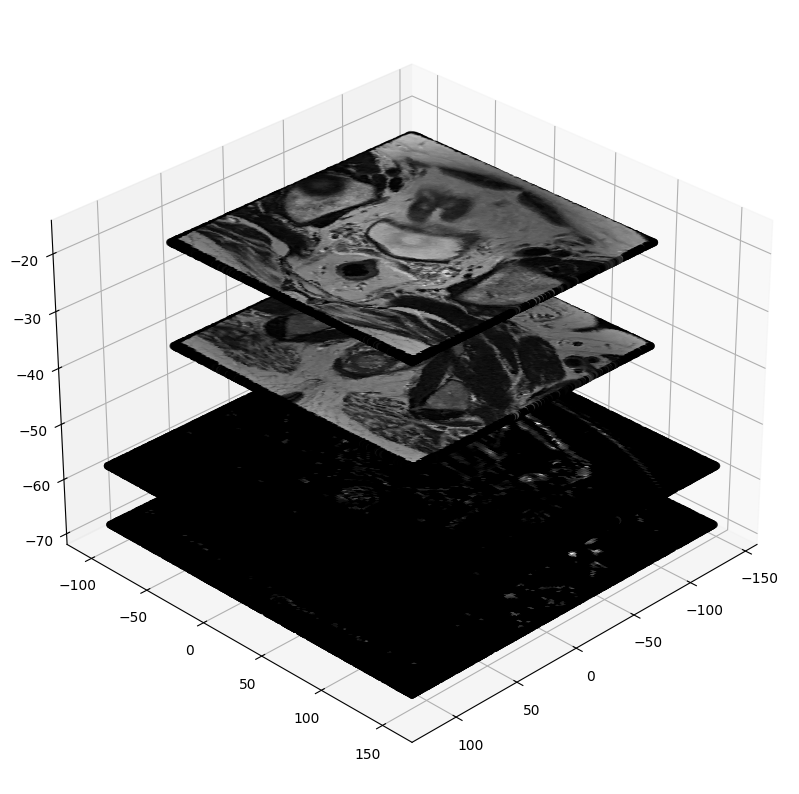

In [11]:
t2_indice = np.random.choice(len(t2_ys), 100000)

t2_img1 = ((t2_img1/t2_img1.max())).flatten()

colors = [[c, c, c] for c in t2_img1[t2_indice]]

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(projection='3d')

ax.scatter(t2_patient_coords_list[0][t2_indice,0], t2_patient_coords_list[0][t2_indice,1], t2_patient_coords_list[0][t2_indice,2], color=colors)

t2_img20 = ((t2_img20/t2_img20.max())).flatten()
colors = [[c, c, c] for c in t2_img20[t2_indice]]
ax.scatter(t2_patient_coords_list[-1][t2_indice,0], t2_patient_coords_list[-1][t2_indice,1], t2_patient_coords_list[-1][t2_indice,2], color=colors)

kt_indice = np.random.choice(len(kt_ys), 100000)

kt_img1 = ((kt_img1/kt_img1.max())).flatten()

colors = [[c, c, c] for c in kt_img1[kt_indice]]

ax.scatter(kt_patient_coords_list[0][kt_indice,0], kt_patient_coords_list[0][kt_indice,1], kt_patient_coords_list[0][kt_indice,2], color=colors)

kt_img20 = ((kt_img20/kt_img20.max())).flatten()
colors = [[c, c, c] for c in kt_img20[kt_indice]]
ax.scatter(kt_patient_coords_list[-1][kt_indice,0], kt_patient_coords_list[-1][kt_indice,1], kt_patient_coords_list[-1][kt_indice,2], color=colors)


ax.view_init(elev=30, azim=45)


[ 5909 25207  1557 ...  9062 15788 12457]


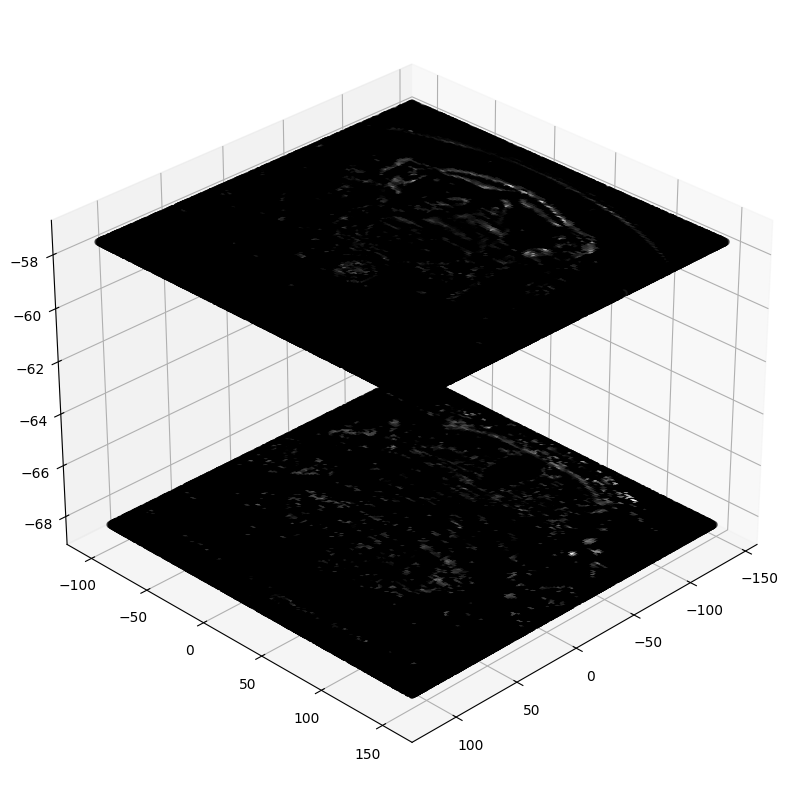

In [9]:
indice = np.random.choice(len(kt_ys), 100000)

print(indice)

kt_img1 = ((kt_img1/kt_img1.max())).flatten()

colors = [[c, c, c] for c in kt_img1[indice]]

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(projection='3d')

ax.scatter(kt_patient_coords_list[0][indice,0], kt_patient_coords_list[0][indice,1], kt_patient_coords_list[0][indice,2], color=colors)

kt_img20 = ((kt_img20/kt_img20.max())).flatten()
colors = [[c, c, c] for c in kt_img20[indice]]
ax.scatter(kt_patient_coords_list[-1][indice,0], kt_patient_coords_list[-1][indice,1], kt_patient_coords_list[-1][indice,2], color=colors)

ax.view_init(elev=30, azim=45)

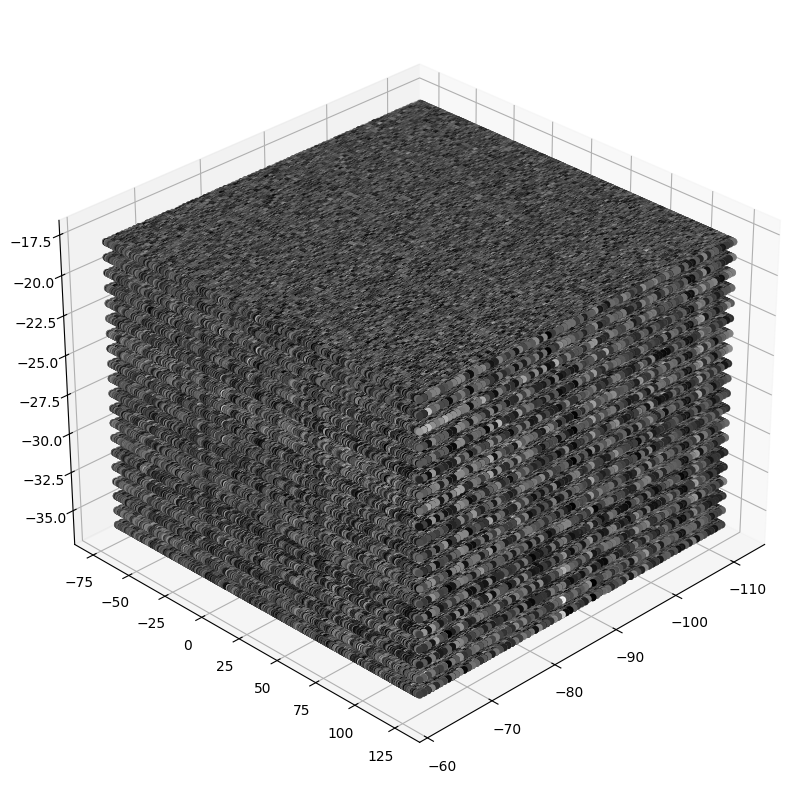

In [12]:
from script_converter import get_img_list

t2_img_list = get_img_list('data/t2/')
kt_img_list = get_img_list('data/ktrans')

t2_indice = np.random.choice(len(t2_ys), 100000)
kt_indice = np.random.choice(len(kt_ys), 100000)

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(projection='3d')

for img, i in zip(t2_img_list, range(20)):

    t2_img = ((img/img.max())).flatten()

    colors = [[c, c, c] for c in t2_img[t2_indice]]

    ax.scatter(t2_patient_coords_list[i][indice,0], t2_patient_coords_list[i][indice,1], t2_patient_coords_list[i][indice,2], color=colors)

ax.view_init(elev=30, azim=45)